In [1]:
import jieba
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./链家北京租房数据.csv')

In [4]:
df.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500


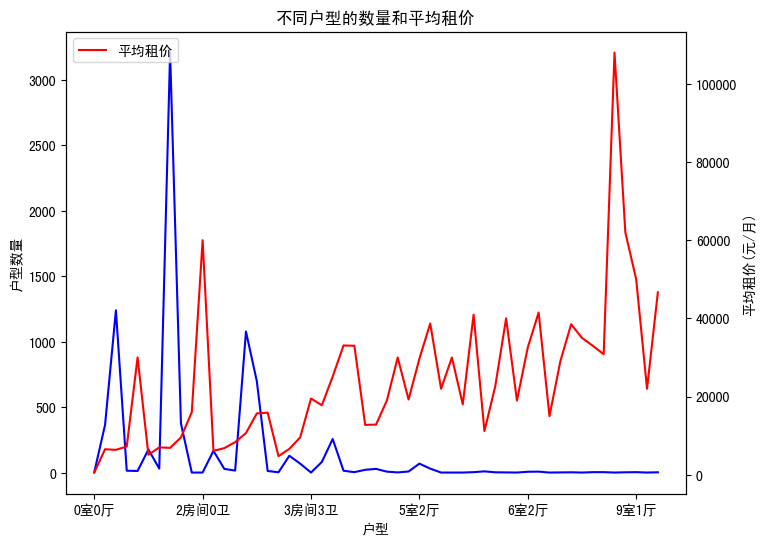

In [5]:
#用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

# 计算不同户型的数量和平均租价
grouped = df.groupby('户型')
count = grouped['户型'].count()
mean_price = grouped['价格(元/月)'].mean()

# 绘制双折线图
plt.figure(figsize=(8, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()
count.plot(kind='line', ax=ax1, color='blue', label='户型数量')
mean_price.plot(kind='line', ax=ax2, color='red', label='平均租价')
ax1.set_xlabel('户型')
ax1.set_ylabel('户型数量')
ax2.set_ylabel('平均租价(元/月)')
plt.title('不同户型的数量和平均租价')
plt.legend(loc='best')
plt.show()

In [6]:
# 计算每个户型的数量  
count = df['户型'].value_counts()  

In [7]:
print(count)

户型
2室1厅     3207
1室1厅     1239
3室1厅     1077
3室2厅      699
2室2厅      376
1室0厅      365
4室2厅      257
1房间1卫     177
2房间1卫     167
3房间1卫     129
4室1厅       82
5室2厅       69
3房间2卫      69
5室3厅       31
2室0厅       31
2房间2卫      29
4房间2卫      29
4房间1卫      22
3室0厅       16
4室3厅       15
1室2厅       15
1房间0卫      13
3室3厅       13
5房间2卫      10
5室1厅        9
4房间3卫       8
6室3厅        8
6室2厅        7
5房间1卫       4
7室2厅        4
7室3厅        4
4室5厅        4
9室1厅        4
5房间3卫       3
8室4厅        3
9室5厅        3
6房间4卫       3
3房间0卫       3
0室0厅        2
6房间3卫       2
5室0厅        2
6室0厅        2
5房间0卫       1
9室2厅        1
6室1厅        1
7室1厅        1
2室3厅        1
2房间0卫       1
5室4厅        1
7室4厅        1
5室5厅        1
3房间3卫       1
6房间1卫       1
Name: count, dtype: int64


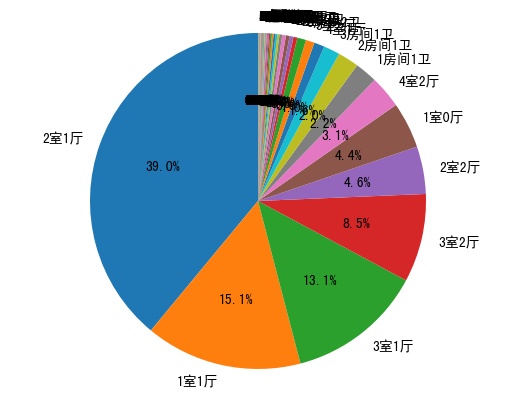

In [8]:
  # 绘制饼图  
fig, ax = plt.subplots()  
ax.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)  
ax.axis('equal')  # 确保饼图是正圆形  
  
plt.show()

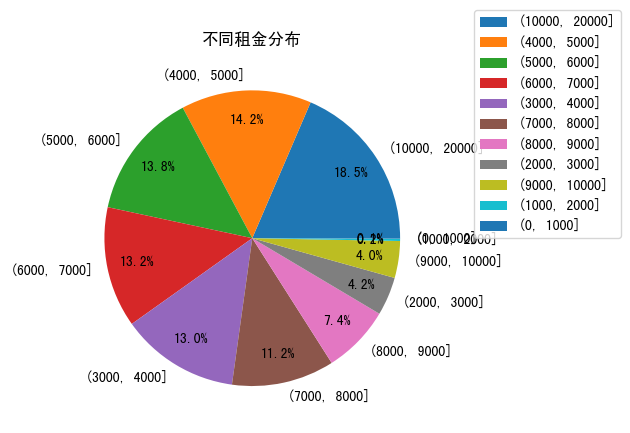

In [9]:
# 计算租金区间
bins = pd.IntervalIndex.from_tuples([(0, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, 5000), (5000, 6000), (6000, 7000), (7000, 8000), (8000, 9000), (9000, 10000), (10000, 20000)])
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000+']
df['price_range'] = pd.cut(df['价格(元/月)'], bins=bins, labels=labels)

# 计算每个租金区间的数量
counts = df['price_range'].value_counts()

# 绘制饼图
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)
plt.title('不同租金分布')
plt.legend(labels=['{}元/月, {}~{}元/月'.format(l, int(b.left), int(b.right)) for l, b in zip(labels, bins)])
plt.legend(loc=(1.1,0.5))

plt.show()

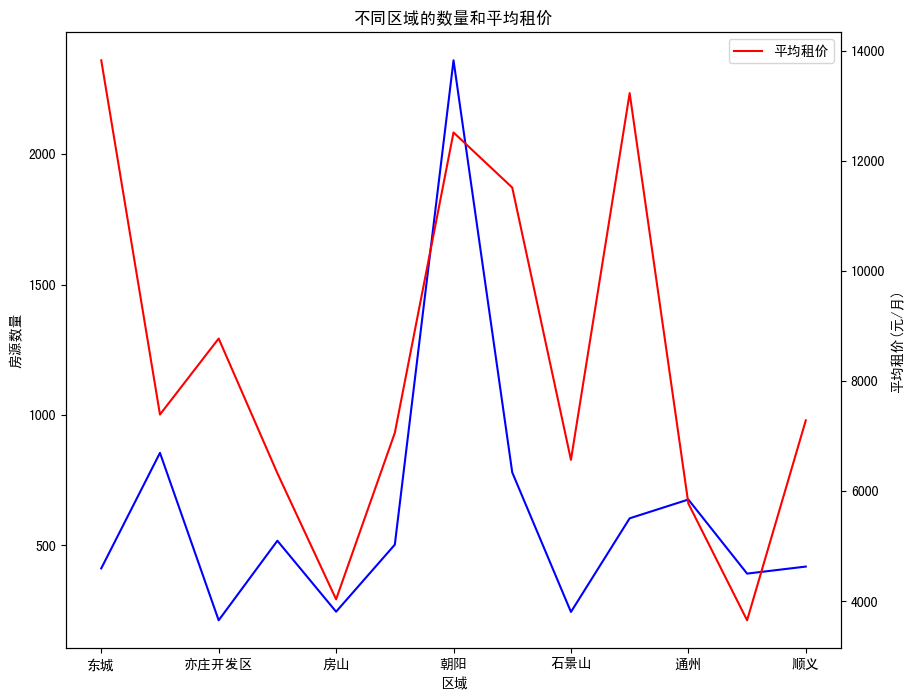

In [10]:
# 计算不同区域的数量和平均租价
grouped = df.groupby('区域')
count = grouped['区域'].count()
mean_price = grouped['价格(元/月)'].mean()

# 绘制双折线图
plt.figure(figsize=(10, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()
count.plot(kind='line', ax=ax1, color='blue', label='房源数量')
mean_price.plot(kind='line', ax=ax2, color='red', label='平均租价')
ax1.set_xlabel('区域')
ax1.set_ylabel('房源数量')
ax2.set_ylabel('平均租价(元/月)')
plt.title('不同区域的数量和平均租价')
plt.legend(loc='best')
plt.show()

/var/folders/7q/r1sgm_6d6s75dl65nndp6t300000gn/T/ipykernel_99409/1701297192.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('面积区间')


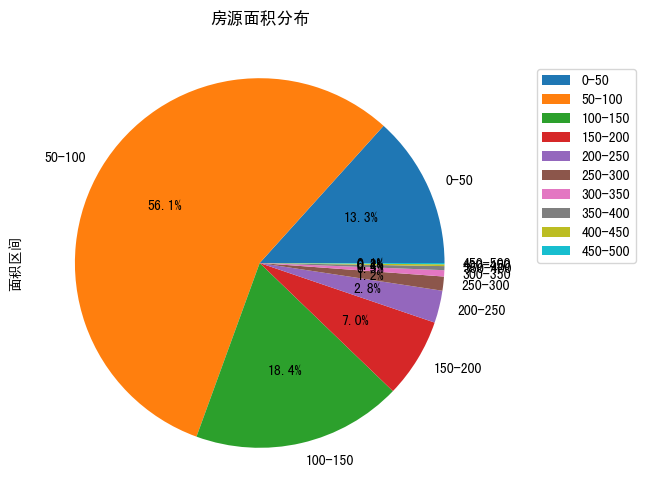

In [11]:
# 计算不同面积区间的数量
df['面积(㎡)'] = df['面积(㎡)'].str[:-2].astype(float)

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500']
df['面积区间'] = pd.cut(df['面积(㎡)'], bins=bins, labels=labels)
grouped = df.groupby('面积区间')
count = grouped['面积区间'].count()

# 绘制饼图
plt.figure(figsize=(8, 6))
count.plot(kind='pie', autopct='%1.1f%%')
plt.title('房源面积分布')
plt.legend(loc=(1.1,0.5))
plt.show()

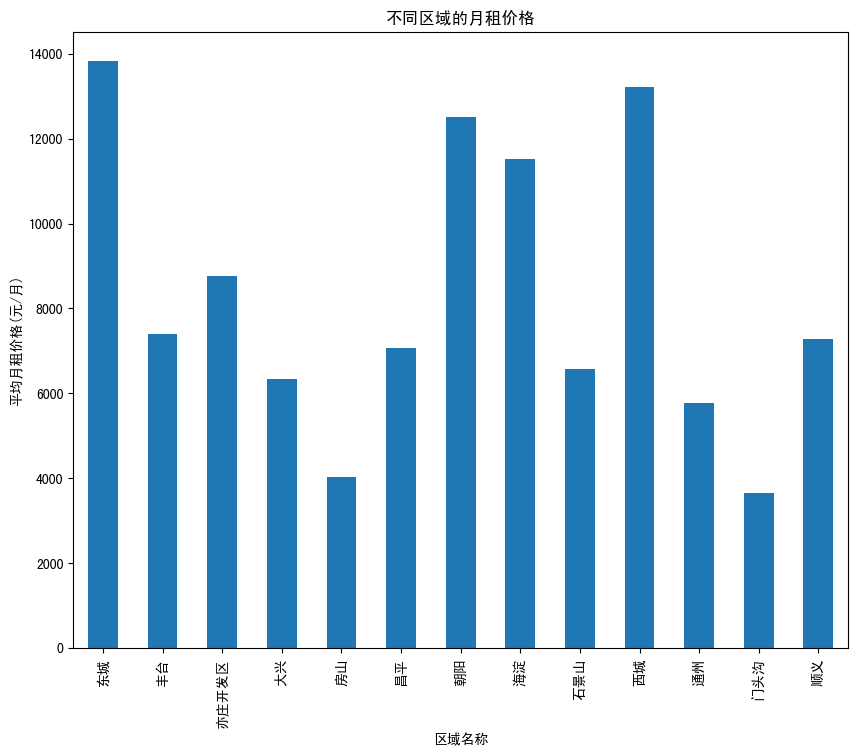

In [15]:
# 按照小区分组，计算平均租金
grouped = df.groupby('区域')
mean_price = grouped['价格(元/月)'].mean()

# 绘制条形图
plt.figure(figsize=(10, 8))
mean_price.plot(kind='bar')
plt.title('不同区域的月租价格')
plt.xlabel('区域名称')
plt.ylabel('平均月租价格(元/月)')
plt.show()

In [19]:
selected_columns = ['面积(㎡)', '价格(元/月)']  
data = df[selected_columns]
data

,面积(㎡),价格(元/月)
0,59.11,10000
1,56.92,6000
2,40.57,6900
3,57.09,8000
4,42.67,5500
...,...,...
8218,114.03,5500
8219,59.00,5000
8220,92.41,5800
8221,71.81,4200


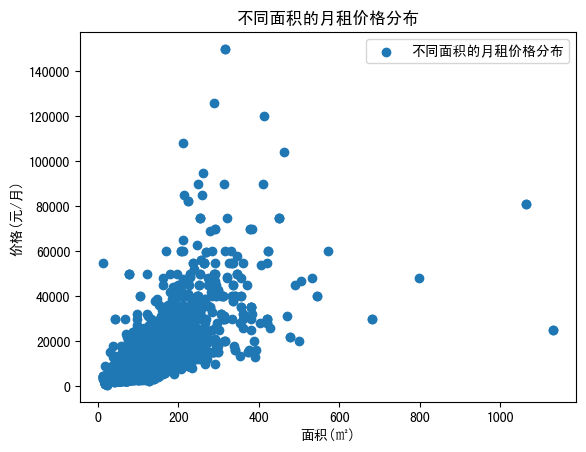

In [20]:
plt.scatter(data['面积(㎡)'], data['价格(元/月)'], label='不同面积的月租价格分布')  # 使用散点图绘制月租价格分布情况，根据面积进行分类显示  
plt.xlabel('面积(㎡)')  # 设置x轴标签为面积列名  
plt.ylabel('价格(元/月)')  # 设置y轴标签为价格列名  
plt.title('不同面积的月租价格分布')  # 设置图表标题为不同面积的月租价格分布情况  
plt.legend()  # 显示图例，以便区分不同面积的月租价格分布情况  
plt.show()  # 显示图表，展示不同面积的月租价格分布情况

In [21]:
selected_columns = ['户型', '价格(元/月)']  
data = df[selected_columns]
data

,户型,价格(元/月)
0,1室0厅,10000
1,3室0厅,6000
2,1室1厅,6900
3,2室1厅,8000
4,1室1厅,5500
...,...,...
8218,3室1厅,5500
8219,4房间2卫,5000
8220,3室1厅,5800
8221,2室1厅,4200


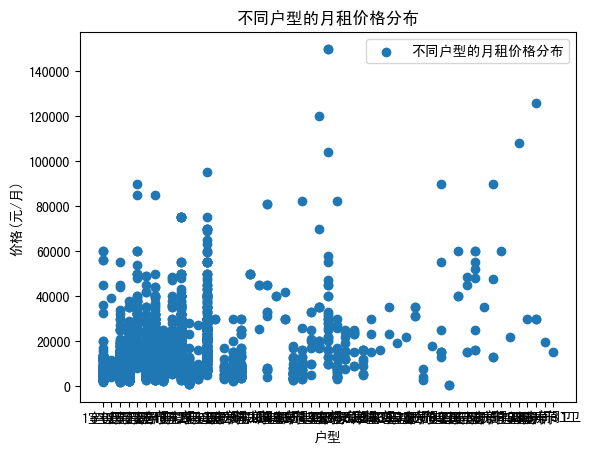

In [22]:
plt.scatter(data['户型'], data['价格(元/月)'], label='不同户型的月租价格分布')  # 使用散点图绘制月租价格分布情况，根据户型进行分类显示  
plt.xlabel('户型')  # 设置x轴标签为户型列名  
plt.ylabel('价格(元/月)')  # 设置y轴标签为价格列名  
plt.title('不同户型的月租价格分布')  # 设置图表标题为不同户型的月租价格分布情况  
plt.legend()  # 显示图例，以便区分不同户型的月租价格分布情况  
plt.show()  # 显示图表，展示不同户型的月租价格分布情况